## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

## Extracting name of files from folders and storing it in a Dictionary

In [2]:
folders = os.listdir('Raw_data')
files = {}

for folder in folders:
    unfiltered_files = os.listdir("Raw_data\\"+str(folder))
    filtered = filter(lambda x: x.split('.')[-1] == 'csv', unfiltered_files)
    filtered_files = []
    for file in filtered:
        filtered_files.append(str(file).split('.')[0])
    files.update({folder: filtered_files})

    
files

{'VA00000000000017': ['RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYjMtODJkYy1kMTE0MDg4OTBkOGQ=',
  'RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MTUtYjFmOC0xMDdlNWI0ODNhY2Y=',
  'RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MGMtYmRiNC1jMWRlZGI5MmM3M2M=',
  'RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYTctYjA4YS01ZjZmMGUzNmZjMjc=',
  'RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3NzMtOWI2Zi02YzcwODkzMDU1NGQ=',
  'RXZlbnRJbmZvcm1hdGlvbjo1ZWQyODcxZS0wYTI1LTQxMWUtOGQ0My0xOTRiZjI3ZDc4ZDA=',
  'RXZlbnRJbmZvcm1hdGlvbjo2MGIxMzM3My03NmIwLTRhZTktYjRiYS0wNDcwMDY1NWU2YWQ=',
  'RXZlbnRJbmZvcm1hdGlvbjo2MWE0NzMzZS02NTkzLTRlNmQtOGIxMy0yMWUwZjFiNWE1ZWM=',
  'RXZlbnRJbmZvcm1hdGlvbjo2ZGEzODliYy02M2I1LTRmNzUtODZhYi0zMDBlY2Y4ZWVmYWI=',
  'RXZlbnRJbmZvcm1hdGlvbjo2ZjYwZTlhNC05OWNhLTRlODAtYTAwYS05MjFlZjlmNWUyMzI=',
  'RXZlbnRJbmZvcm1hdGlvbjo3NDBjM2U2OS0wOWZjLTQ2ODQtYTljMy05MTRiMzI0N2RiOWY=',
  'RXZlbnRJbmZvcm1hdGlvbjo3NjhhZDFlMi02NzIyLTQyYjQtOWJkOC00ZjQ3YjE4ODU1MGM=',
  'RXZlbnRJbmZvcm1hdGlvbjo3YjBhOWUzYi02MDk3L

## Storing all sensor data for each Activity in 'data'

In [3]:
#time_frame = 400
data = []

for folder in folders:
    folder_files = files[folder]
    for file in folder_files:
        directory = 'C:\\Users\\kaushik.agrawal\\Downloads\\Raw_data (2)\\Raw_data\\'+folder+'\\'+file
        data_file = pd.read_csv(directory+'.csv')
        with open(directory+'.json') as json_data:
            Event_ID = json.load(json_data)['Event_ID']
        data_file['second'] = data_file['timestamp']//1
        data_file.loc[:0,'Event_ID'] = Event_ID
        data.append(data_file)

In [4]:
data[0]

,t,lc0,lc1,lc2,lc3,timestamp,sum,second,Event_ID
0,0 days 00:00:00,4814,2504,5337,701,0.000000,13356,0.0,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...
1,0 days 00:00:00.025000,4656,2789,5481,497,0.025000,13423,0.0,NaN
2,0 days 00:00:00.050000,4566,3137,5583,483,0.050000,13769,0.0,NaN
3,0 days 00:00:00.075000,4640,3449,5724,628,0.075000,14441,0.0,NaN
4,0 days 00:00:00.100000,4741,3531,5806,808,0.100000,14886,0.0,NaN
...,...,...,...,...,...,...,...,...,...
6075,0 days 00:02:31.875000,2966,2429,4511,-1695,151.874936,8211,151.0,NaN
6076,0 days 00:02:31.900000,2967,2427,4510,-1697,151.899936,8207,151.0,NaN
6077,0 days 00:02:31.925000,2966,2429,4511,-1695,151.924936,8211,151.0,NaN
6078,0 days 00:02:31.950000,2967,2428,4510,-1696,151.949936,8209,151.0,NaN


In [5]:
def Activity(tag):
    if 'urination' in tag:
        return 'urination'
    elif 'non_elimination' in tag:
        return 'non_elimination'
    elif 'defecation' in tag:
        return 'defecation'
    return np.nan
    
def Cat_In_Box(tag):
    if 'cat in box' in tag:
        return 1
    return 0

def Synapse_Labeled(tag):
    if 'synapse_labeled' in tag:
        return 1
    return 0

def Tare_Weight_Fun(w):
    if type(w) is list:
        return sum(w)
    return np.nan

## Creating Final DataFrame with data from JSON files

In [6]:
final = pd.DataFrame()

for folder in folders:
    folder_files = files[folder]
    for file in folder_files:
        directory = 'C:\\Users\\kaushik.agrawal\\Downloads\\Raw_data (2)\\Raw_data\\'+folder+'\\'+file
        with open(directory+'.json') as json_data:
            json_file = json.load(json_data)
        tags = json_file['Tags']
        del json_file['Tags']
        del json_file['Free_text']
        activity = Activity(tags)
        cat_in_box = Cat_In_Box(tags)
        synapse_labeled = Synapse_Labeled(tags)
        json_file.update({'Activity': activity})
        json_file.update({'Cat_In_Box': cat_in_box})
        json_file.update({'Synapse_Labeled': synapse_labeled})
        temp = pd.DataFrame([json_file])
        temp['Weight_of_cat'] = float(temp['Weight_of_cat'])
        final = final.append(temp,ignore_index=True)

final['Event_Date'] =final['Event_start_time'].apply(lambda x: x.split('T')[0])
temp = final['Event_start_time'].apply(lambda x: x.split('-05:00')[0])
final['Event_start_time'] = pd.to_datetime(temp, format='%Y-%m-%dT%H:%M:%S') - timedelta(hours=5)
final['Event_start_time'] = pd.to_datetime(final['Event_start_time'] , utc=True)
final['Event_start_time_hour'] = final['Event_start_time'].dt.hour
final['Given_Tare_Weight'] = final['Tare_weight'].apply(Tare_Weight_Fun)
final = final.drop('Tare_weight', axis=1)
final

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,Given_Tare_Weight
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,6589.0,urination,1,0,2020-09-05,5,NaN
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,9,NaN
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,5139.0,urination,1,0,2020-09-03,10,NaN
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,7,NaN
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,2021-08-24,20,6984.0
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,2021-04-26,1,7767.0
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,2021-04-27,22,-6965.0
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,2021-09-02,20,6310.0


In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Device_ID              13075 non-null  object             
 1   Event_ID               13075 non-null  object             
 2   Event_start_time       13075 non-null  datetime64[ns, UTC]
 3   Name_of_cat            12829 non-null  object             
 4   Weight_of_cat          13075 non-null  float64            
 5   Activity               13072 non-null  object             
 6   Cat_In_Box             13075 non-null  int64              
 7   Synapse_Labeled        13075 non-null  int64              
 8   Event_Date             13075 non-null  object             
 9   Event_start_time_hour  13075 non-null  int64              
 10  Given_Tare_Weight      12062 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), objec

## Treating nulls in Name_of_cat

In [8]:
cat_per_device = final.groupby(['Device_ID'])['Name_of_cat'].nunique()

devices = final['Device_ID'].unique()

for device in devices:
    if cat_per_device.loc[device] == 1:
        name = final[final['Device_ID'] == device]['Name_of_cat'].unique()[0]
        final['Name_of_cat'] = np.where((final['Device_ID'] == device), name, final['Name_of_cat'])

final[final['Name_of_cat'].isnull()]

# Replaced Name_of_cat with cat name on devices where only 1 cat used that 1 device

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,Given_Tare_Weight
376,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo1NDVmYTUwYi1jYjk2LTQzYj...,2021-09-13 10:15:31+00:00,None,4934.0,non_elimination,1,0,2021-09-13,10,2317.0
407,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo2YmIxOGI4Ni1mYWQ5LTRjYT...,2021-09-12 06:00:05+00:00,None,4760.0,non_elimination,1,0,2021-09-12,6,2875.0
443,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo4ZWIxMmY0Ni1hNTFlLTQ5Mj...,2021-09-14 06:01:23+00:00,None,4772.0,non_elimination,1,0,2021-09-14,6,2300.0
444,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo5M2I3MTE5ZC01NTk1LTQ4Y2...,2021-09-13 10:45:28+00:00,None,6285.0,non_elimination,1,0,2021-09-13,10,2318.0
446,VA00000000000037,RXZlbnRJbmZvcm1hdGlvbjo5MWE3ODA5Ny1lODAyLTRhNT...,2021-09-12 18:56:33+00:00,None,4924.0,non_elimination,1,0,2021-09-12,18,2869.0
...,...,...,...,...,...,...,...,...,...,...,...
9318,VA00000000000156,RXZlbnRJbmZvcm1hdGlvbjozZWRmMTEzZS1iYjVkLTQ0NT...,2021-03-31 22:20:51+00:00,None,4878.0,non_elimination,1,0,2021-04-01,22,9057.0
9569,VA00000000000159,RXZlbnRJbmZvcm1hdGlvbjo4MDBjMDIxZC04OWEwLTQ0OW...,2021-04-02 02:15:12+00:00,None,4234.0,non_elimination,1,0,2021-04-02,2,7724.0
9768,VB00000000000171,RXZlbnRJbmZvcm1hdGlvbjo5MjFmNmQwZS05ODgyLTQ4Nj...,2021-04-28 07:54:35+00:00,None,5251.0,non_elimination,1,0,2021-04-28,7,9455.0
10189,VB00000000000173,RXZlbnRJbmZvcm1hdGlvbjo4ZDljM2M2YS1lNzQzLTRkYm...,2021-05-02 02:21:12+00:00,None,5177.0,non_elimination,1,0,2021-05-02,2,15571.0


## Cat Weight Distribution box plot with Interquartile Range

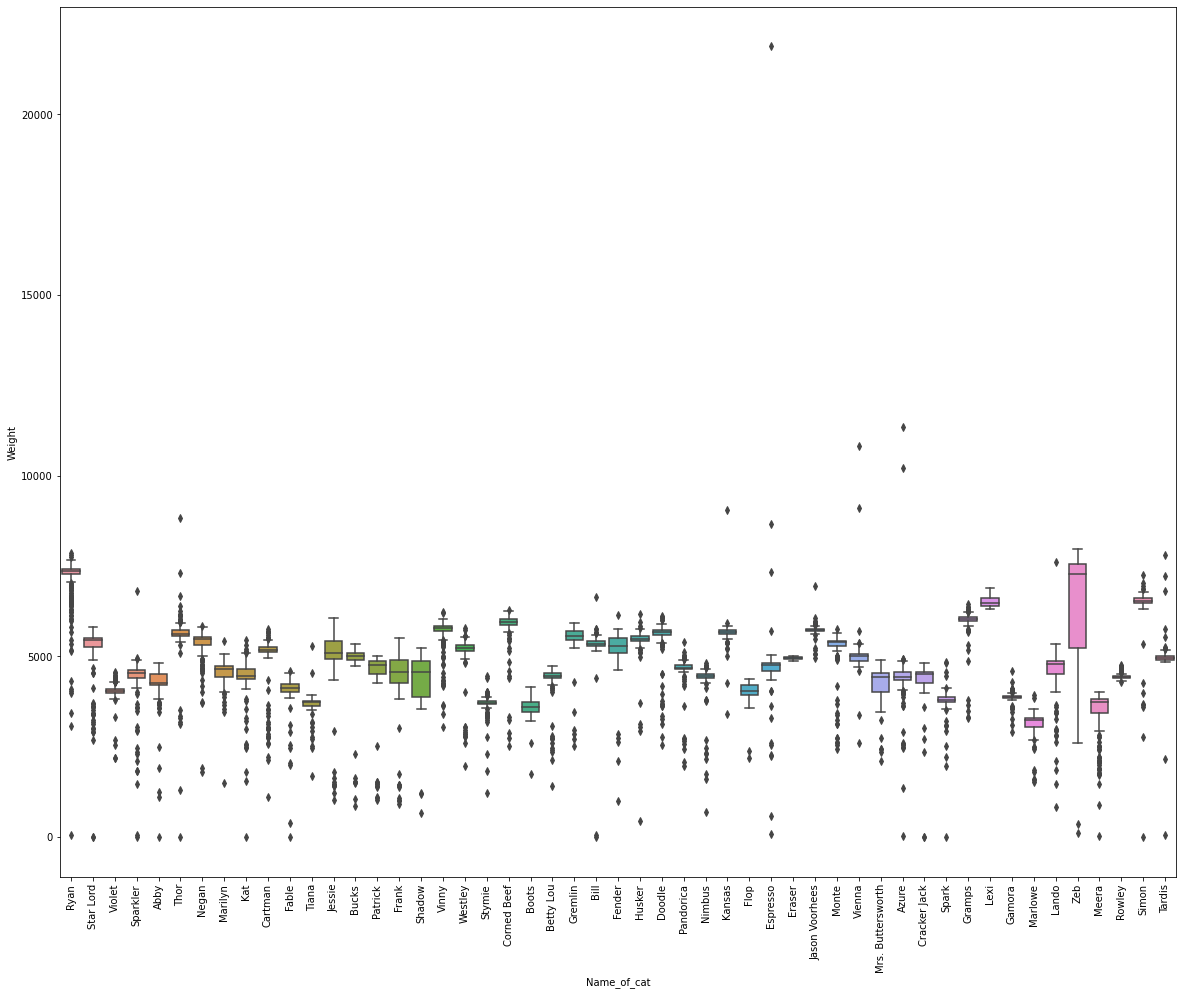

In [9]:
fig = plt.figure(figsize=(20,16))
sns.boxplot(y='Weight_of_cat', x='Name_of_cat',data=final)
plt.xticks(rotation=90)
plt.ylabel('Weight')
plt.show()

## Detecting and Treating Outliers in Weight_of_cat with IQR method

In [10]:
cat_names = final['Name_of_cat'].unique()
cat_names = cat_names[cat_names != np.array(None)]

cat_weight = final.groupby(['Name_of_cat'])[['Weight_of_cat']].describe()

cat_weight = pd.DataFrame(cat_weight)
cat_weight['IQR'] = cat_weight['Weight_of_cat']['75%'] - cat_weight['Weight_of_cat']['25%']

for cat_name in cat_names:
    final['Weight_of_cat'] = np.where((final['Name_of_cat'] == cat_name) & 
                                      ((final['Weight_of_cat'] < (cat_weight['Weight_of_cat']['25%'][cat_name] - 3*(cat_weight['IQR'][cat_name]))) | 
                                       (final['Weight_of_cat'] > (cat_weight['Weight_of_cat']['75%'][cat_name] + 3*(cat_weight['IQR'][cat_name])))), 
                                      cat_weight['Weight_of_cat']['50%'][cat_name], final['Weight_of_cat'])
    
# Used IQR method to treat outliers, values those are 3 times IQR is treated as Outlier and replaced with median.

## Cat Weight Distribution box plot after treating outliers

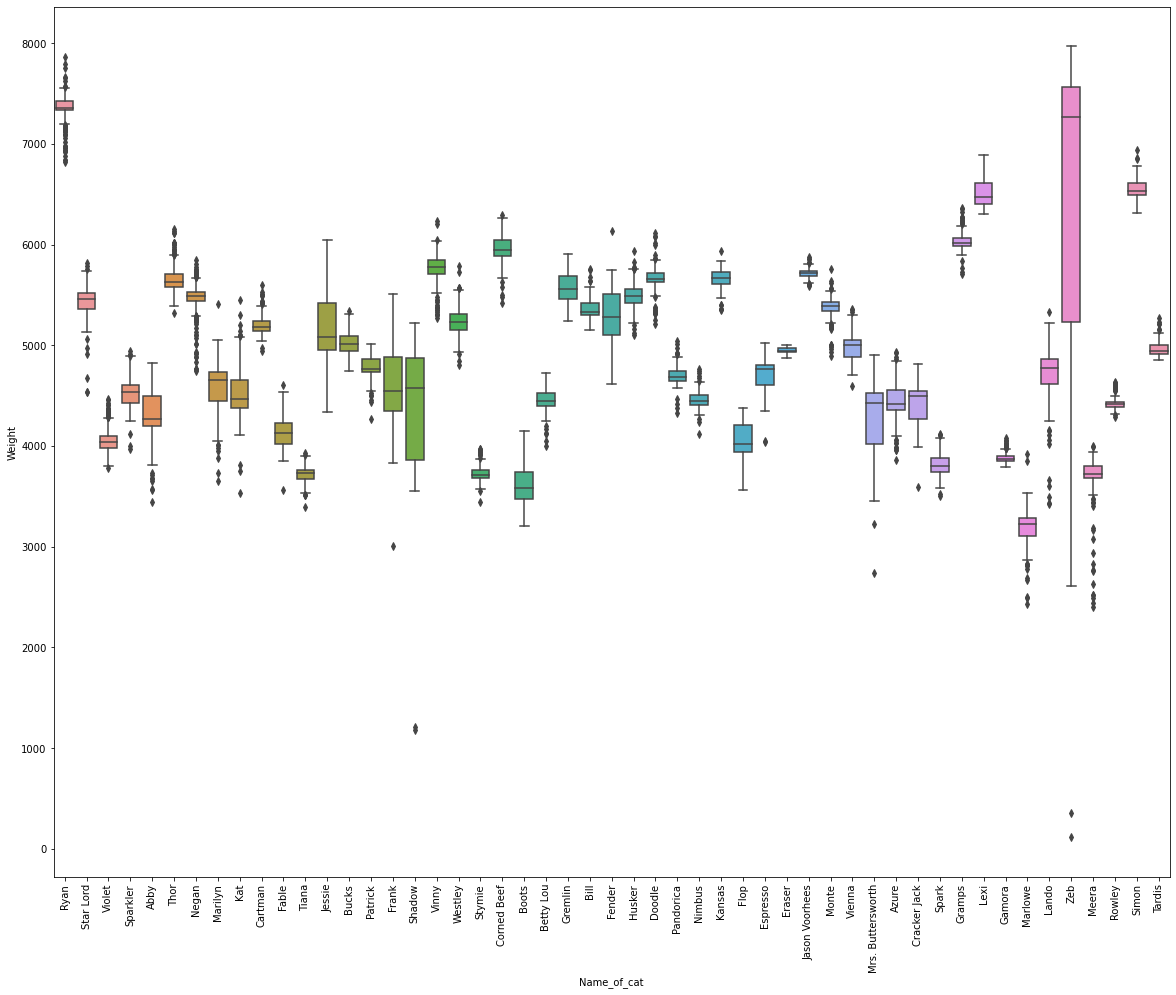

In [11]:
fig = plt.figure(figsize=(20,16))
sns.boxplot(y='Weight_of_cat', x='Name_of_cat',data=final)
plt.xticks(rotation=90)
plt.ylabel('Weight')
plt.show()

In [12]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Device_ID              13075 non-null  object             
 1   Event_ID               13075 non-null  object             
 2   Event_start_time       13075 non-null  datetime64[ns, UTC]
 3   Name_of_cat            12931 non-null  object             
 4   Weight_of_cat          13075 non-null  float64            
 5   Activity               13072 non-null  object             
 6   Cat_In_Box             13075 non-null  int64              
 7   Synapse_Labeled        13075 non-null  int64              
 8   Event_Date             13075 non-null  object             
 9   Event_start_time_hour  13075 non-null  int64              
 10  Given_Tare_Weight      12062 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), objec

## Aggregation functions for Sensor Data

In [13]:
def Step_In_Out_Time(row):
    tare = data[row]['sum'].iloc[len(data[row])-40:].mean()
    duration = data[row]['timestamp'].max()
    flag = (tare + final['Weight_of_cat'][row])*0.7 < data[row]['sum'].max()
    sit_times = 0
    step_out = 0
    step_in = 0
    sit_times = 0
    longest_step_in = 0
    longest_step_out = 0
    longest_sit = 0
    first_stepin_time = 0
    first_stepout_time = 0
    last_stepin_time = 0
    last_stepout_time = 0
    
    while(flag):
        step_in = data[row][(data[row]['sum'] > (tare + final['Weight_of_cat'][row])*0.7) & (data[row]['timestamp'] > step_out)]['timestamp'].min()
        step_out = data[row][(data[row]['sum'] < (tare + final['Weight_of_cat'][row])*0.7) & (data[row]['timestamp'] > step_in)]['timestamp'].min()
        sit_time = step_out - step_in
        check = ((data[row]['timestamp'] > step_out) & (data[row]['sum'] > (tare+final['Weight_of_cat'][row]*0.7))).sum()
        if check > 0:
            flag = True
        else:
            flag = False
        if sit_time > 0:
            sit_times += 1
            last_stepin_time = step_in
            last_stepout_time = step_out
            if sit_times == 1:
                first_stepin_time = step_in
                first_stepout_time = step_out
            if sit_time > longest_sit:
                longest_sit = sit_time
                longest_step_in = step_in
                longest_step_out = step_out
    return tare, duration, longest_step_in, longest_step_out, longest_sit, sit_times, first_stepin_time, first_stepout_time, last_stepin_time ,last_stepout_time

    
def Points_Fun(row, tare, cat_weight):
    count = len(data[row]['sum'][data[row]['sum'] > 0.7*(tare+cat_weight)])
    var = data[row][data[row]['sum'] > 0.7*(tare+cat_weight)]['sum'].var()
    if count <= 1:
        var = 0
    return count, count/len(data[row]), var

## Creating features from Sensor data and adding in final Daraframe

In [14]:
Calculated_Tare_Weight = []
Points_Count = []
Points_Percentage = []
Activity_Duration = []
Stepping_In_Time = []
Stepping_Out_Time = []
Sit_Time = []
Times_Stepped = []
First_Stepin_Time = []
First_Stepout_Time = []
Last_Stepin_Time = []
Last_Stepout_Time = []
Weight_Variance = []


for row in range(len(final)):
    tare_temp, duration, step_in, step_out, sit, times_stepped, First_stepin_time, First_stepout_time, Last_stepin_time ,Last_stepout_time = Step_In_Out_Time(row)
    Calculated_Tare_Weight.append(tare_temp)
    Activity_Duration.append(duration)
    Stepping_In_Time.append(step_in)
    Stepping_Out_Time.append(step_out)
    Sit_Time.append(sit)
    Times_Stepped.append(times_stepped)
    First_Stepin_Time.append(First_stepin_time)
    First_Stepout_Time.append(First_stepout_time)
    Last_Stepin_Time.append(Last_stepin_time)
    Last_Stepout_Time.append(Last_stepout_time)
    points_count, points_percentage, variance = Points_Fun(row, tare_temp, final['Weight_of_cat'][row])
    Points_Count.append(points_count)
    Points_Percentage.append(points_percentage)
    Weight_Variance.append(variance)
    

final['Activity_Duration'] = Activity_Duration
final['Calculated_Tare_Weight'] = Calculated_Tare_Weight
final['Weight_With_Cat'] = final['Calculated_Tare_Weight'] + final['Weight_of_cat']
final['Points_Count'] = Points_Count
final['Points_Percentage'] = Points_Percentage
final['Stepping_In_Time'] = Stepping_In_Time
final['Stepping_Out_Time'] = Stepping_Out_Time
final['Sit_Time'] = Sit_Time
final['Times_Stepped'] = Times_Stepped
final['First_Stepin_Time'] = First_Stepin_Time
final['First_Stepout_Time'] = First_Stepout_Time
final['Last_Stepin_Time'] = Last_Stepin_Time
final['Last_Stepout_Time'] = Last_Stepout_Time
final['Weight_Variance'] = Weight_Variance

final

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,2020-09-05,5,...,0.291447,0.025000,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,9,...,0.470313,0.025000,52.550000,52.525000,1,0.025000,52.550000,0.025000,52.550000,1.586288e+05
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,2020-09-03,10,...,0.429688,1.374937,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,7,...,0.168675,0.025000,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,1,...,0.596481,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,2021-08-24,20,...,0.822213,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1.028918e+05
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,2021-04-26,1,...,0.137613,53.392769,71.583398,18.190629,1,53.392769,71.583398,53.392769,71.583398,1.259322e+06
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,2021-04-27,22,...,0.565029,0.025000,77.893402,77.868402,1,0.025000,77.893402,0.025000,77.893402,8.579901e+04
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,2021-09-02,20,...,0.948808,0.025000,194.742593,194.717593,1,0.025000,194.742593,0.025000,194.742593,3.478798e+04


In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Device_ID               13075 non-null  object             
 1   Event_ID                13075 non-null  object             
 2   Event_start_time        13075 non-null  datetime64[ns, UTC]
 3   Name_of_cat             12931 non-null  object             
 4   Weight_of_cat           13075 non-null  float64            
 5   Activity                13072 non-null  object             
 6   Cat_In_Box              13075 non-null  int64              
 7   Synapse_Labeled         13075 non-null  int64              
 8   Event_Date              13075 non-null  object             
 9   Event_start_time_hour   13075 non-null  int64              
 10  Given_Tare_Weight       12062 non-null  float64            
 11  Activity_Duration       13075 non-null  f

In [16]:
final.head()

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,2020-09-05,5,...,0.291447,0.025000,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,9,...,0.470313,0.025000,52.550000,52.525000,1,0.025000,52.550000,0.025000,52.550000,1.586288e+05
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,2020-09-03,10,...,0.429688,1.374937,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,7,...,0.168675,0.025000,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,1,...,0.596481,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05


In [17]:
final.to_csv('final.csv')

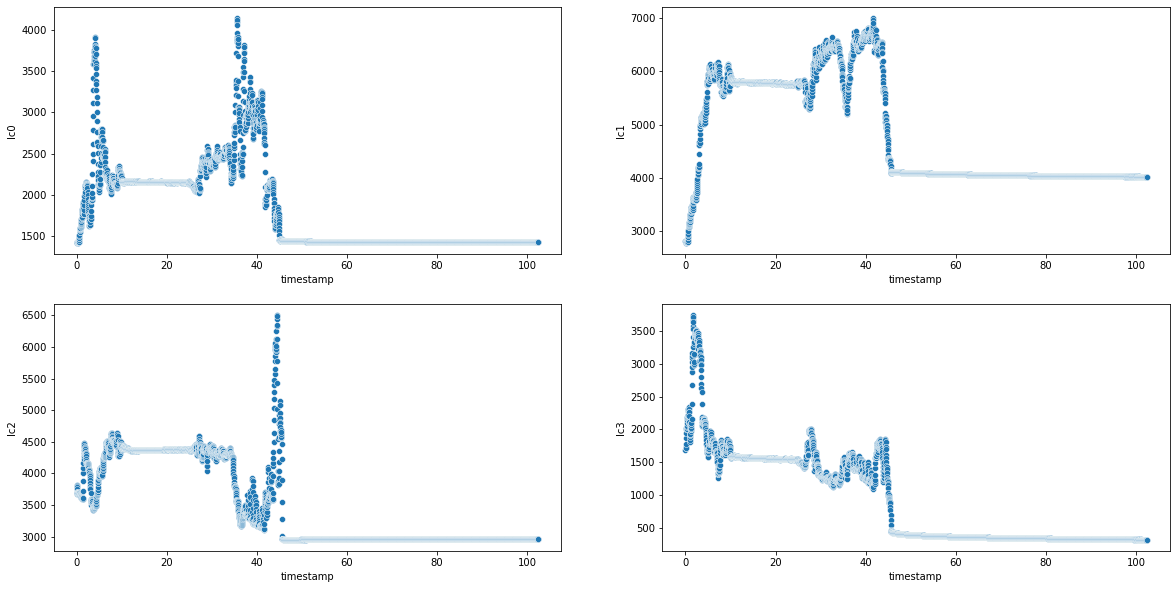

In [18]:
#plot = data[0].groupby('second').mean()
plot = data[2]

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x='timestamp',y='lc0',data = plot)

ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x='timestamp',y='lc1',data = plot)


ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x='timestamp',y='lc2',data = plot)


ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x='timestamp',y='lc3',data = plot)

plt.show()

########################## Sum of all 4 sensors ##########################


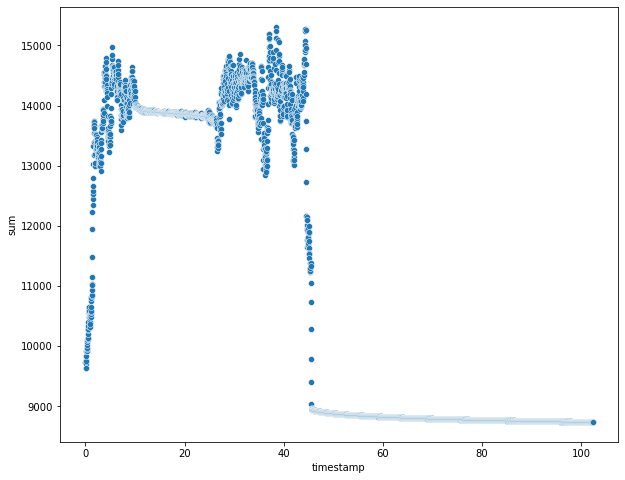

In [19]:
plot = data[2]
print("########################## Sum of all 4 sensors ##########################")

fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


ax1 = fig.add_subplot(1, 1, 1)
sns.scatterplot(x='timestamp',y='sum',data = plot)

plt.show()